<h1 style='text-align: center'>Logistic Regression From Scratch</h1>

<p  style='text-align: center'>
This notebook is in <span style='color: green; font-weight: 700'>Active</span> state of development!
<a style='font-weight:700' href='https://github.com/LilDataScientist'> Code on GitHub! </a></p>

<div style='text-align: center'>
    <img src='https://i.postimg.cc/C5VCKqsV/1-e-Mim-R6-Wx-Lvcct-Zsv-Q8-UPIQ.png' width='500' />
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

<h1 style='background-color: #dae8fc; border: 1px solid #94add0; padding: 10px; font-weight: 400; text-align: center'>Part 1 📓</h1>

# What is Logistic Regression

Logistic regression uses an equation as the representation, very much like linear regression. Input values $X$ are combined linearly using weights or coefficient values to predict an output value $Y$

A key difference from linear regression is that the output value being modeled is a binary value (0 or 1) rather than a numeric value.

Linear Regression models always map a set of $x$ values to a resulting $y$ value on a continuous range. This means that the $y$ value can be -5, 0.4 or 768. How would we use such a Regression model if our yy value is categorical such as a binary value which is either 0 or 1? Is there a way to define a threshold so that a value such as 768 is assigned to the category 1 while a small value such as -5 gets assigned to the category 0?

That's where Logistic Regression comes into play. With Logistic Regression we can map any resulting $y$ value, no matter its magnitude to a value between 0 and 1.

# Why don't we use linear regression for class separation?

(Pic. 1) On axes $x$ feature, and on axes $y$ label of the class. We can see that line doing pretty good on separating these two classes. For example we could say that if value of y > 0.5, then class is positive.

(Pic. 2) Let's add data, that definetely relates to the positive class. And our line will change dramatically. Now, some points that are definetelly has different classes, are different classes with probability of around 0.5. But it is not true!

That's happens, since linear model does not have purpose to separate data. Its main purpose is to minimize MSE, and to minimize MSE it needs to minimize sum of margins between data and line. 

One more problem here is that for input with value 100 for example we get output of 2 which is weird since our class has labels of 1 and 0 only.

**We need to fit our output data in range between 0 and 1. And sigmoid function will help us!**

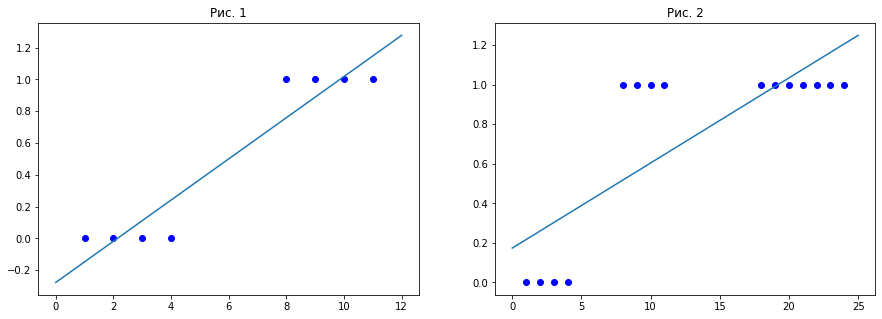

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

X = np.array([[1],[2],[3],[4],[8],[9],[10],[11]])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
model = LinearRegression()
model.fit(X, Y)
x_values = np.linspace(0, 12, 100)
y_values = [model.intercept_ + x * model.coef_[0] for x in x_values]
ax[0].plot(x_values, y_values)
ax[0].scatter(X, Y, c='b');
ax[0].title.set_text('Рис. 1')

X = np.array([[1],[2],[3],[4],[8],[9],[10],[11], [18], [19], [20], [21], [22], [23], [24]])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
model = LinearRegression()
model.fit(X, Y)
x_values = np.linspace(0, 25, 100)
y_values = [model.intercept_ + x * model.coef_[0] for x in x_values]
ax[1].plot(x_values, y_values)
ax[1].scatter(X, Y, c='b');
ax[1].title.set_text('Рис. 2')

# Sigmoid function

We are using sigmoid for interpretating probability. We need to tune sigmoid that way so that sigmoid can descrive data very well.

The Sigmoid Function squishes all its inputs (values on the x-axis) between 0 and 1 as we can see on the y-axis in the graph below.

Assume that class is positive if sigmoid is > 0.5, this happend when x > 0.
Is sigmoid < 0.5, class is negative and x < 0.

We can see that as $x$ increases towards positive infinity the output gets closer to 1, and as $x$ decreases towards negative infinity the output gets closer to 0.

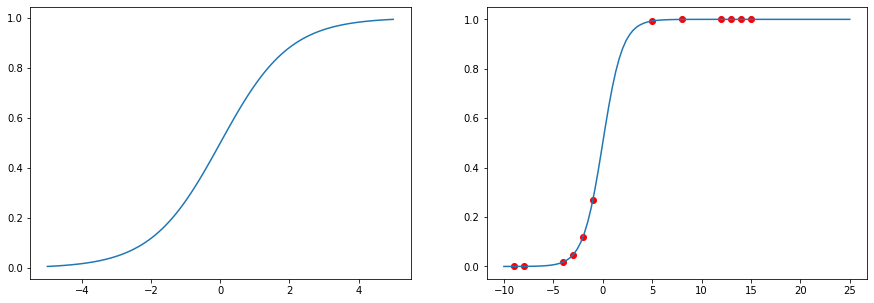

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

fig, ax = plt.subplots(1, 2, figsize=(15,5))

x_values = np.linspace(-5, 5, 100)
y_values =  [sigmoid(x) for x in x_values]

ax[0].plot(x_values, y_values);

X = np.array([[-1],[-2],[-3],[-4],[-8],[-9],[5],[8], [12], [13], [14], [15]])
Y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

x_values = np.linspace(-10, 25, 100)
y_values =  [sigmoid(x) for x in x_values]

ax[1].plot(x_values, y_values);
ax[1].scatter(X, [sigmoid(x) for x in X], c='r');

## Loss function

Let's create some rule to penalize our model for error!

We know, that $y$ can be 0 or 1. And our $\hat{y}$ - predicted value is between 0 and 1. If $y$ is similar to $\hat{y}$ the less error we want to have, and the more $\hat{y}$ differ from $y$ the more erorr we want to have. Well, it's easy to find a function for that task!


$$\large
Cost(h_{\theta}(x),y) =  \begin{equation}
    \begin{cases}
         -log(h_{\theta}(x)) \text{ if } y = 1 \\
         -log(1 - h_{\theta}(x)) \text{ if } y = 0
    \end{cases}\,
\end{equation}
$$

When y = 1, and true class = 1 then the error is 0, because they are the same (that means that we predicted corrrectly). Otherwise, if sigmoid output tends to zero while our true class is 1, the error tends to plus infinity. Pretty logical, by the way.


When y = 0, and true class = 0, then the error is 0, because they are the same (that means that we predicted corrrectly). Otherwise, if sigmoid output tends to 1 while our true class is 0, the error tends to plus infinity.

If you don't get idea, look at this plot. It shows how error would grow!

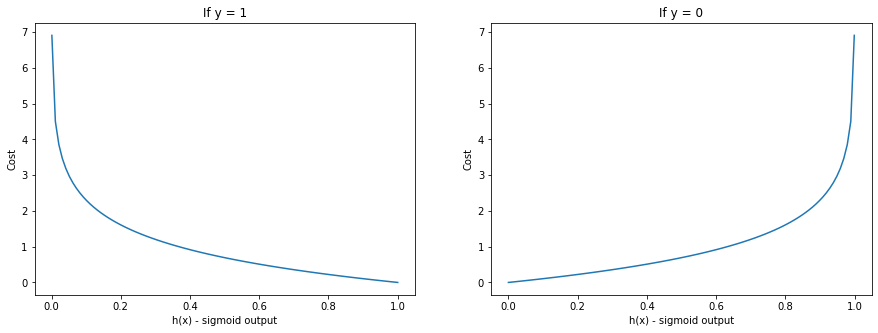

In [4]:
# hx - sigmoid values between (0, 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

def if_y_1(hx):
    return -np.log(hx)

x_values = np.linspace(0.001, 1, 100)
y_values = [if_y_1(hx) for hx in x_values]

ax[0].plot(x_values, y_values)
ax[0].title.set_text('If y = 1');
ax[0].set_xlabel('h(x) - sigmoid output')
ax[0].set_ylabel('Cost')

def if_y_0(hx):
    return -np.log(1 - hx)

x_values = np.linspace(0, 0.999, 100)
y_values = [if_y_0(hx) for hx in x_values]

ax[1].plot(x_values, y_values)
ax[1].title.set_text('If y = 0');
ax[1].set_xlabel('h(x) - sigmoid output')
ax[1].set_ylabel('Cost');

We will rewrite loss function in something more understandble.

$$\large
Cost(h_{\theta}(x),y) = -[y=1]log(h_{\theta}(x) - [y=0]log(1 - h_{\theta}(x)) 
$$

We can't differentiate that function so let's do 1 more transformation:

$$\large
Cost(h_{\theta}(x),y) = -y \cdot log(h_{\theta}(x) - (y-1) \cdot log(1 - h_{\theta}(x)) 
$$

Why and how does it work? 
* y is always 1 or 0
* If y = 1, then function will look like $-log(h_{\theta}(x))$
* If y = 0, then function will look like $-log(1 - h_{\theta}(x))$

# Gradient of loss function

$$\large
h_{\theta}(x) = \frac{1}{1 + \exp(-x)} 
$$

$\text{}$

$$\large
Cost(h_{\theta}(x),y) = -y \cdot log(h_{\theta}(x) - (y-1) \cdot log(1 - h_{\theta}(x)) 
$$
  
Particial derivative with respect to $w_i$ = $(h_{\theta}(x_i) - y_i)x_i$  
Particial derivative with respect to $bias$ = $h_{\theta}(x_i) - y_i$

# Implementaion Logistic Regression

In [5]:
class LogisticRegression:
    
    def __init__(self,lr=0.1,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = X @ self.weights + self.bias
            hx = self._sigmoid(linear_model)
            
            dw = (X.T * (hx - y)).T.mean(axis=0)
            db = (hx - y).mean(axis=0)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db 

    def predict(self,X):
        linear_model = np.dot(X,self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
  
    def _sigmoid(self,x):
        return(1/(1+np.exp(-x)))

# Use model

In [6]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

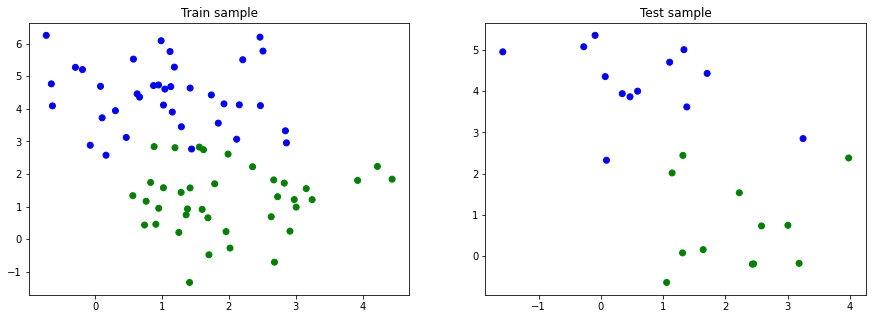

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

color = ['blue' if l == 0 else 'green' for l in y_train]
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=color, label='1')
ax[0].title.set_text('Train sample')

color = ['blue' if l == 0 else 'green' for l in y_test]
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=color, label='1');
ax[1 ].title.set_text('Test sample')

Let's fit our model to the data and then predicts its values for test data!

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train);

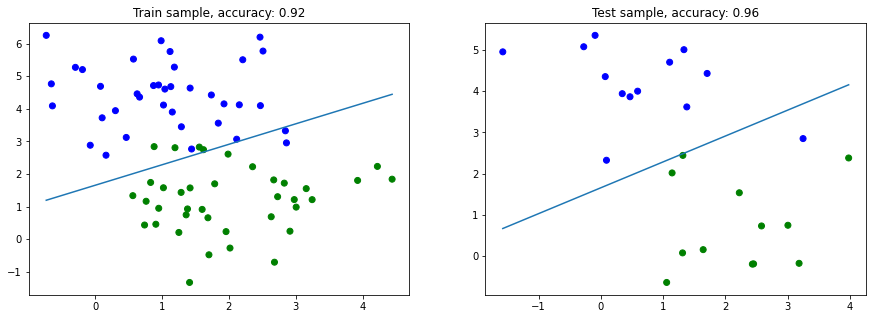

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = [(-model.bias - model.weights[0]*x) / model.weights[1] for x in x_values]
color = ['blue' if l == 0 else 'green' for l in y_train]
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=color, label='1')
ax[0].plot(x_values, y_values)
ax[0].title.set_text('Train sample, accuracy: {}'.format(accuracy_score(y_train, model.predict(X_train))))

x_values = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_values = [(-model.bias - model.weights[0]*x) / model.weights[1] for x in x_values]
color = ['blue' if l == 0 else 'green' for l in y_test]
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=color, label='1');
ax[1].plot(x_values, y_values)
ax[1].title.set_text('Test sample, accuracy: {}'.format(accuracy_score(y_test, model.predict(X_test))))